In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf


In [3]:
data=pd.read_csv("D:/Downloads/over.csv")
data.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,15-24,Odisha,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,No,No,Never in union,No births,1
1,25-34,Bihar,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Middle,No,No,No,Married,No births,1
2,25-34,Dadra & Nagar Haveli And Daman & Diu,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1
3,15-24,Gujarat,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,one-two,1
4,15-24,Uttar Pradesh,Rural,Higher,Safe,Unhygenic,Hindu,Unimproved,Poor,No,No,No,Never in union,No births,1
5,35-49,Jammu & Kashmir,Rural,No education,Safe,Unhygenic,Muslim,Unimproved,Poor,Yes,five or more,No,Married,one-two,1
6,25-34,Madhya Pradesh,Rural,Primary,Safe,Hygenic,Hindu,Improved,Middle,No,one-two,Yes,Married,No births,1
7,25-34,Uttar Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Middle,No,No,No,Never in union,No births,1
8,15-24,Uttar Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,No births,1
9,35-49,Uttarakhand,Rural,No education,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,0


In [4]:
data.shape

(681818, 15)

In [5]:
data.isnull().sum()

Age                        0
State                      0
residence                  0
education                  0
drinking_water             0
toilet_facility            0
Religion                   0
cooking_fuel               0
Wealth                     0
Currently_pregnant         0
children                   0
Currently_breastfeeding    0
marital_status             0
Births                     0
Bmi                        0
dtype: int64

In [6]:
dummies_state = pd.get_dummies(data.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
dummies_age = pd.get_dummies(data.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,1,0
8,1,0,0
9,0,0,1


In [8]:
dummies_res = pd.get_dummies(data.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [9]:

dummies_edu = pd.get_dummies(data.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,0,0,0,1
9,0,1,0,0


In [10]:
dummies_water = pd.get_dummies(data.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [11]:
dummies_toilet = pd.get_dummies(data.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,1,0


In [12]:
dummies_religion = pd.get_dummies(data.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [13]:
dummies_fuel = pd.get_dummies(data.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,1,0


In [14]:
dummies_wealth = pd.get_dummies(data.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0
9,0,0,1


In [15]:
dummies_pregnant = pd.get_dummies(data.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [16]:
dummies_children = pd.get_dummies(data.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,1,0
9,0,0,1,0


In [17]:
dummies_breastfeeding = pd.get_dummies(data.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [18]:
dummies_marital = pd.get_dummies(data.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [19]:
dummies_births = pd.get_dummies(data.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [20]:
data12 = pd.concat([data,dummies_age,dummies_state,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
data12

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,15-24,Odisha,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
1,25-34,Bihar,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
2,25-34,Dadra & Nagar Haveli And Daman & Diu,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,1,0,0,0
3,15-24,Gujarat,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,1,0,1,0,0,0,0,0,1,0
4,15-24,Uttar Pradesh,Rural,Higher,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681813,25-34,Gujarat,Rural,Higher,Safe,Hygenic,Hindu,Unimproved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
681814,15-24,Rajasthan,Urban,Secondary,Safe,Hygenic,Hindu,Unimproved,Rich,No,...,1,0,1,0,0,0,0,0,1,0
681815,25-34,Tripura,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,1,0,0,0
681816,15-24,Karnataka,Rural,Secondary,Safe,Unhygenic,Muslim,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0


In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame
# List the columns you want to remove
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df1 = data12

# Drop the specified columns
df1.drop(columns=columns_to_remove, inplace=True)


In [22]:
X = df1.drop('Bmi',axis = 'columns')
X.head()

,15-24,25-34,35-49,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X = df1.drop('Bmi', axis='columns')
print(X.head(10)) 


   15-24  25-34  35-49  Andaman & Nicobar Islands  Andhra Pradesh  \
0      1      0      0                          0               0   
1      0      1      0                          0               0   
2      0      1      0                          0               0   
3      1      0      0                          0               0   
4      1      0      0                          0               0   
5      0      0      1                          0               0   
6      0      1      0                          0               0   
7      0      1      0                          0               0   
8      1      0      0                          0               0   
9      0      0      1                          0               0   

   Arunachal Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  \
0                  0      0      0           0             0   
1                  0      0      1           0             0   
2                  0      0      0           0  

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X = df1.drop('Bmi', axis='columns')
print(X.tail(25)) 

        15-24  25-34  35-49  Andaman & Nicobar Islands  Andhra Pradesh  \
681793      0      0      1                          0               0   
681794      0      0      1                          0               0   
681795      0      1      0                          0               0   
681796      0      1      0                          0               0   
681797      0      0      1                          0               0   
681798      0      1      0                          0               0   
681799      1      0      0                          0               0   
681800      1      0      0                          0               0   
681801      1      0      0                          0               0   
681802      0      0      1                          0               0   
681803      0      0      1                          0               0   
681804      0      0      1                          0               0   
681805      1      0      0           

In [25]:
y = df1.Bmi
y.tail(25)


681793    1
681794    1
681795    1
681796    1
681797    0
681798    1
681799    1
681800    1
681801    1
681802    0
681803    0
681804    1
681805    1
681806    1
681807    1
681808    1
681809    1
681810    1
681811    1
681812    1
681813    1
681814    1
681815    1
681816    1
681817    1
Name: Bmi, dtype: int64

In [26]:
y = df1.Bmi
y.head(10)


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
Name: Bmi, dtype: int64

In [27]:
X.shape

(681818, 71)

In [28]:
y.shape

(681818,)

Train Test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Random Forest

In [24]:
# Random forest
model = RandomForestClassifier(n_estimators=500, random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7587046434542841
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.24      0.33     34403
           1       0.78      0.93      0.85    101961

    accuracy                           0.76    136364
   macro avg       0.67      0.59      0.59    136364
weighted avg       0.73      0.76      0.72    136364



In [25]:
# Random forest K2
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [pred for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.7571287352343294
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    255013
           1       0.54      0.24      0.33     85896

    accuracy                           0.76    340909
   macro avg       0.66      0.59      0.59    340909
weighted avg       0.72      0.76      0.72    340909

Classification Report for Fold 2:
Accuracy Score: 0.7581114021630406
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    255488
           1       0.54      0.24      0.33     85421

    accuracy                           0.76    340909
   macro avg       0.66      0.58      0.59    340909
weighted avg       0.72      0.76      0.72    340909



In [26]:
# Random forest K5
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [pred for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.7583966442756153
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    102174
           1       0.54      0.24      0.33     34190

    accuracy                           0.76    136364
   macro avg       0.66      0.59      0.59    136364
weighted avg       0.72      0.76      0.72    136364

Classification Report for Fold 2:
Accuracy Score: 0.7578686456836116
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    101850
           1       0.55      0.25      0.34     34514

    accuracy                           0.76    136364
   macro avg       0.67      0.59      0.60    136364
weighted avg       0.72      0.76      0.72    136364

Classification Report for Fold 3:
Accuracy Score: 0.7585066439822827
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    102307
           1       0.54      0

In [27]:
# Random forest K10
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [pred for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.7584993106685048
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     51066
           1       0.54      0.24      0.34     17116

    accuracy                           0.76     68182
   macro avg       0.66      0.59      0.59     68182
weighted avg       0.72      0.76      0.72     68182

Classification Report for Fold 2:
Accuracy Score: 0.7592766419289548
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     51108
           1       0.54      0.24      0.33     17074

    accuracy                           0.76     68182
   macro avg       0.67      0.59      0.59     68182
weighted avg       0.73      0.76      0.72     68182

Classification Report for Fold 3:
Accuracy Score: 0.7578833123111671
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     50879
           1       0.55      0

Decision Tree

In [28]:
# Decision tree 
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7595077807600358
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     51037
           1       0.55      0.24      0.33     17144

    accuracy                           0.76     68181
   macro avg       0.67      0.59      0.59     68181
weighted avg       0.73      0.76      0.72     68181



In [29]:
# Decision tree K2
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.7570495352132094
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    255013
           1       0.54      0.24      0.33     85896

    accuracy                           0.76    340909
   macro avg       0.66      0.58      0.59    340909
weighted avg       0.72      0.76      0.72    340909

Classification Report for Fold 2:
Accuracy Score: 0.7580439354783828
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    255488
           1       0.54      0.24      0.33     85421

    accuracy                           0.76    340909
   macro avg       0.66      0.58      0.59    340909
weighted avg       0.72      0.76      0.72    340909



In [30]:
# Decision tree K5
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.7586459769440614
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    102174
           1       0.54      0.24      0.33     34190

    accuracy                           0.76    136364
   macro avg       0.66      0.58      0.59    136364
weighted avg       0.72      0.76      0.72    136364

Classification Report for Fold 2:
Accuracy Score: 0.7578393124285002
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    101850
           1       0.55      0.24      0.34     34514

    accuracy                           0.76    136364
   macro avg       0.67      0.59      0.59    136364
weighted avg       0.72      0.76      0.72    136364

Classification Report for Fold 3:
Accuracy Score: 0.7585066439822827
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    102307
           1       0.54      0

In [31]:
# Decision tree K10
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For regression, you might want to convert predicted values to discrete classes
    # For simplicity, let's round the predicted values to the nearest integer
    y_pred_rounded = [round(pred) for pred in y_pred]
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rounded)}")
    print(classification_report(y_test, y_pred_rounded))


Classification Report for Fold 1:
Accuracy Score: 0.7582939778827257
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     51066
           1       0.54      0.24      0.33     17116

    accuracy                           0.76     68182
   macro avg       0.66      0.59      0.59     68182
weighted avg       0.72      0.76      0.72     68182

Classification Report for Fold 2:
Accuracy Score: 0.7588953096125077
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     51108
           1       0.54      0.23      0.33     17074

    accuracy                           0.76     68182
   macro avg       0.66      0.58      0.59     68182
weighted avg       0.72      0.76      0.72     68182

Classification Report for Fold 3:
Accuracy Score: 0.7573406470916078
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     50879
           1       0.55      0

ANN

In [30]:
# ANN 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
# Convert probabilities to binary labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.7633 - loss: 0.4879 - val_accuracy: 0.7674 - val_loss: 0.4816
Epoch 2/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.7670 - loss: 0.4811 - val_accuracy: 0.7681 - val_loss: 0.4800
Epoch 3/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.7678 - loss: 0.4807 - val_accuracy: 0.7682 - val_loss: 0.4796
Epoch 4/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7691 - loss: 0.4776 - val_accuracy: 0.7682 - val_loss: 0.4801
Epoch 5/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7682 - loss: 0.4795 - val_accuracy: 0.7681 - val_loss: 0.4793
Epoch 6/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7686 - loss: 0.4796 - val_accuracy: 0.7676 - val_loss: 0.4802
Epoch 7/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7684 - loss: 0.4784 - val_accuracy: 0.7686 - val_loss: 0.4812
Epoch 8/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 

In [31]:
# Ann k2
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=2, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy and F1 score for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)

# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)


8523/8523 ━━━━━━━━━━━━━━━━━━━━ 8s 874us/step
8523/8523 ━━━━━━━━━━━━━━━━━━━━ 8s 906us/step
Mean Accuracy: 0.7673552673552673


In [32]:
# Ann k5
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=5, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy and F1 score for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)

# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)


3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 855us/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 915us/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 899us/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 916us/step
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 900us/step
Mean Accuracy: 0.767676104659866


In [33]:
# Ann k10
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=10, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy and F1 score for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)

# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)


1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step
1705/1705 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step
Mean Accuracy: 0.7674799280912987


MLP

In [36]:
# MLP 
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy score and classification report
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.761546471890996
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     51037
           1       0.57      0.20      0.29     17144

    accuracy                           0.76     68181
   macro avg       0.68      0.57      0.58     68181
weighted avg       0.73      0.76      0.72     68181



In [37]:
# MLP K2
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Classification Report for Fold {i+1}:")
    print(classification_report(y_test, y_pred.round()))

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    255013
           1       0.55      0.24      0.33     85896

    accuracy                           0.76    340909
   macro avg       0.67      0.59      0.59    340909
weighted avg       0.73      0.76      0.72    340909

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85    255488
           1       0.55      0.22      0.31     85421

    accuracy                           0.76    340909
   macro avg       0.67      0.58      0.58    340909
weighted avg       0.72      0.76      0.72    340909



In [38]:
# MLP K5
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Classification Report for Fold {i+1}:")
    print(classification_report(y_test, y_pred.round()))

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    102174
           1       0.55      0.24      0.34     34190

    accuracy                           0.76    136364
   macro avg       0.67      0.59      0.60    136364
weighted avg       0.73      0.76      0.72    136364

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85    101850
           1       0.56      0.24      0.34     34514

    accuracy                           0.76    136364
   macro avg       0.67      0.59      0.60    136364
weighted avg       0.73      0.76      0.72    136364

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.79      0.94      0.85    102307
           1       0.55      0.24      0.33     34057

    accuracy                           0.76    136364
   macro avg       0.67   

In [39]:
# MLP K10
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"Classification Report for Fold {i+1}:")
    print(classification_report(y_test, y_pred.round()))

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     51066
           1       0.56      0.20      0.29     17116

    accuracy                           0.76     68182
   macro avg       0.67      0.57      0.57     68182
weighted avg       0.72      0.76      0.71     68182

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86     51108
           1       0.56      0.21      0.31     17074

    accuracy                           0.76     68182
   macro avg       0.67      0.58      0.58     68182
weighted avg       0.73      0.76      0.72     68182

Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     50879
           1       0.56      0.24      0.34     17303

    accuracy                           0.76     68182
   macro avg       0.67   

KNN

In [40]:
# KNN 
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7356888282659392
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83     51037
           1       0.46      0.28      0.35     17144

    accuracy                           0.74     68181
   macro avg       0.62      0.59      0.59     68181
weighted avg       0.70      0.74      0.71     68181



In [41]:
# Knn k2
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as per your requirement

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Classification Report for Fold 1:
Accuracy Score: 0.730731661528443
              precision    recall  f1-score   support

           0       0.78      0.89      0.83    255013
           1       0.44      0.27      0.33     85896

    accuracy                           0.73    340909
   macro avg       0.61      0.58      0.58    340909
weighted avg       0.70      0.73      0.71    340909

Classification Report for Fold 2:
Accuracy Score: 0.7240377930767449
              precision    recall  f1-score   support

           0       0.78      0.87      0.83    255488
           1       0.42      0.28      0.34     85421

    accuracy                           0.72    340909
   macro avg       0.60      0.58      0.58    340909
weighted avg       0.69      0.72      0.70    340909



In [42]:
# Knn k5
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as per your requirement

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Classification Report for Fold 1:
Accuracy Score: 0.7293567217154088
              precision    recall  f1-score   support

           0       0.79      0.87      0.83    102174
           1       0.44      0.31      0.37     34190

    accuracy                           0.73    136364
   macro avg       0.62      0.59      0.60    136364
weighted avg       0.70      0.73      0.71    136364

Classification Report for Fold 2:
Accuracy Score: 0.7328767123287672
              precision    recall  f1-score   support

           0       0.78      0.89      0.83    101850
           1       0.46      0.28      0.35     34514

    accuracy                           0.73    136364
   macro avg       0.62      0.58      0.59    136364
weighted avg       0.70      0.73      0.71    136364

Classification Report for Fold 3:
Accuracy Score: 0.7298553870523012
              precision    recall  f1-score   support

           0       0.78      0.88      0.83    102307
           1       0.43      0

In [43]:
# Knn k10
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as per your requirement

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for Fold {i+1}:")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Classification Report for Fold 1:
Accuracy Score: 0.7203660790237892
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     51066
           1       0.43      0.34      0.38     17116

    accuracy                           0.72     68182
   macro avg       0.61      0.59      0.60     68182
weighted avg       0.70      0.72      0.71     68182

Classification Report for Fold 2:
Accuracy Score: 0.733654043589217
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     51108
           1       0.44      0.26      0.33     17074

    accuracy                           0.73     68182
   macro avg       0.61      0.58      0.58     68182
weighted avg       0.70      0.73      0.71     68182

Classification Report for Fold 3:
Accuracy Score: 0.723695403478924
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     50879
           1       0.43      0.2

Naive Bayes

In [44]:
# Naive Bayes
model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.5310277056658014
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.42      0.57     51037
           1       0.33      0.87      0.48     17144

    accuracy                           0.53     68181
   macro avg       0.62      0.64      0.53     68181
weighted avg       0.76      0.53      0.55     68181



Random Forest


Average Sensitivity (SE): 0.893995518622988
Average Specificity (SP): 0.2886412584462593
Average Positive Predictive Value (PPV): 0.7404387722969175
Average Negative Predictive Value (NPV): 0.5453979856103177
Average F1-score (FM): 0.8100032041103067
Average Accuracy Score: 0.708867086528712


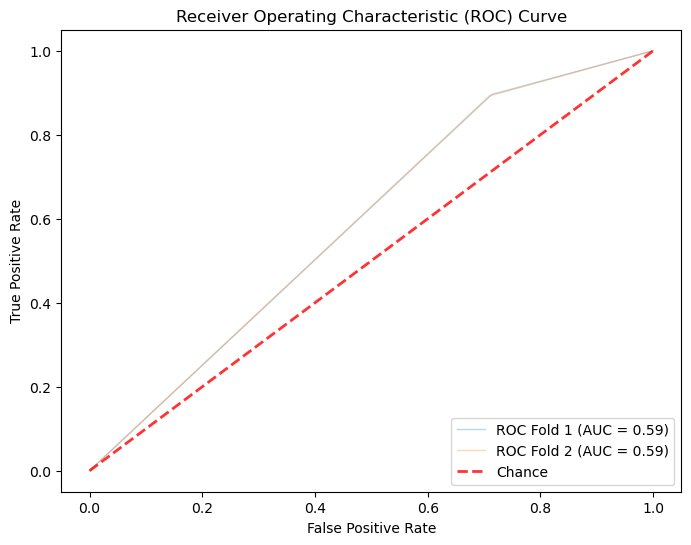

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random forest K2
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Average Sensitivity (SE): 0.9325664864954561
Average Specificity (SP): 0.24133312114997874
Average Positive Predictive Value (PPV): 0.7855440468645014
Average Negative Predictive Value (NPV): 0.5456720929094676
Average F1-score (FM): 0.8527637412700397
Average Accuracy Score: 0.758887270103872


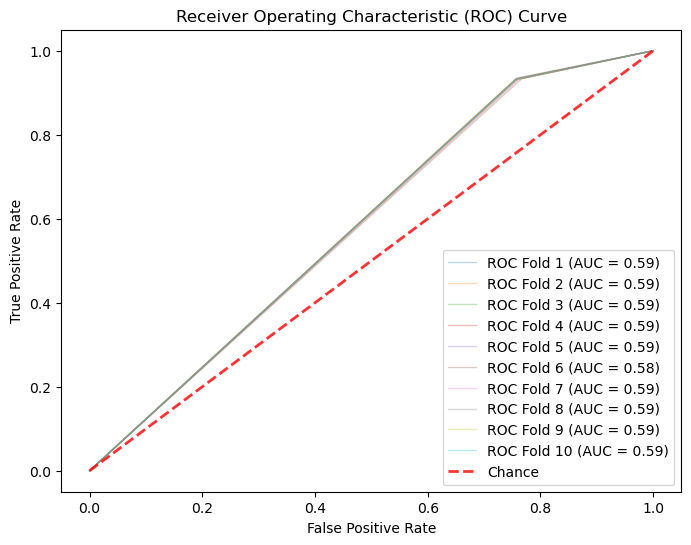

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random forest K10
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Average Sensitivity (SE): 0.9312219042160862
Average Specificity (SP): 0.2434354451055749
Average Positive Predictive Value (PPV): 0.7857682462696607
Average Negative Predictive Value (NPV): 0.5428950917858882
Average F1-score (FM): 0.8523339349794776
Average Accuracy Score: 0.7584091362437994


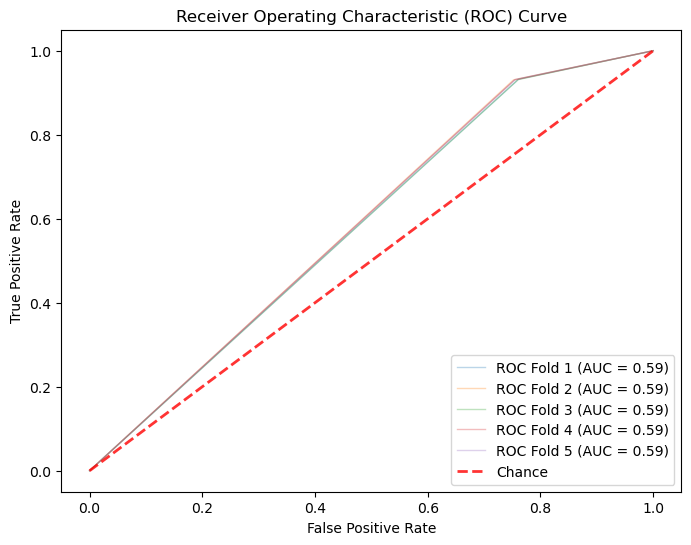

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Random forest K5
model = RandomForestClassifier(n_estimators=500, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree


Average Sensitivity (SE): 0.9254004596008178
Average Specificity (SP): 0.2472786980164972
Average Positive Predictive Value (PPV): 0.785568091600292
Average Negative Predictive Value (NPV): 0.5265934794490297
Average F1-score (FM): 0.84977023376885
Average Accuracy Score: 0.7550138013370138


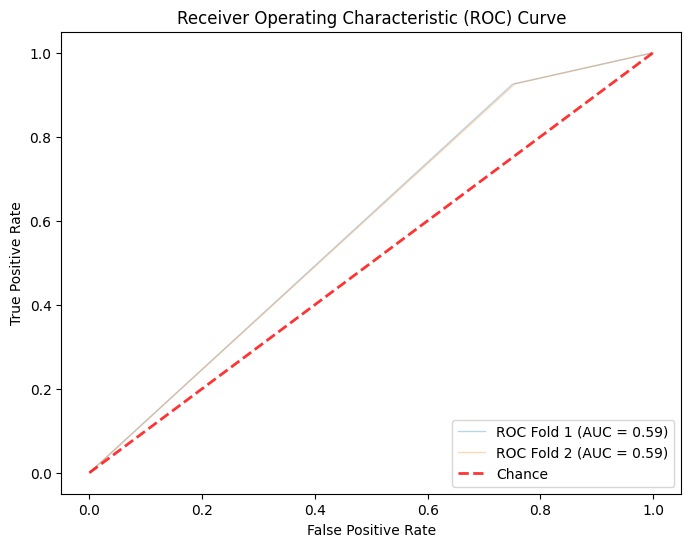

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
# Decision tree K2
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.9270482453203328
Average Specificity (SP): 0.24840286343745727
Average Positive Predictive Value (PPV): 0.7861195186958265
Average Negative Predictive Value (NPV): 0.5332855206937746
Average F1-score (FM): 0.8507870227469441
Average Accuracy Score: 0.7565303355964857


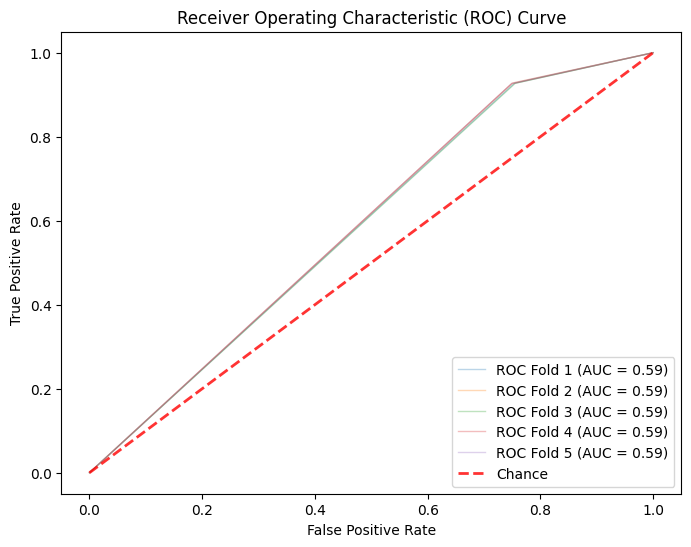

In [26]:
# Decision tree K5
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.9281744381691169
Average Specificity (SP): 0.24680539714186428
Average Positive Predictive Value (PPV): 0.7859687293858989
Average Negative Predictive Value (NPV): 0.5355681868910893
Average F1-score (FM): 0.8511718450697847
Average Accuracy Score: 0.7569747363422067


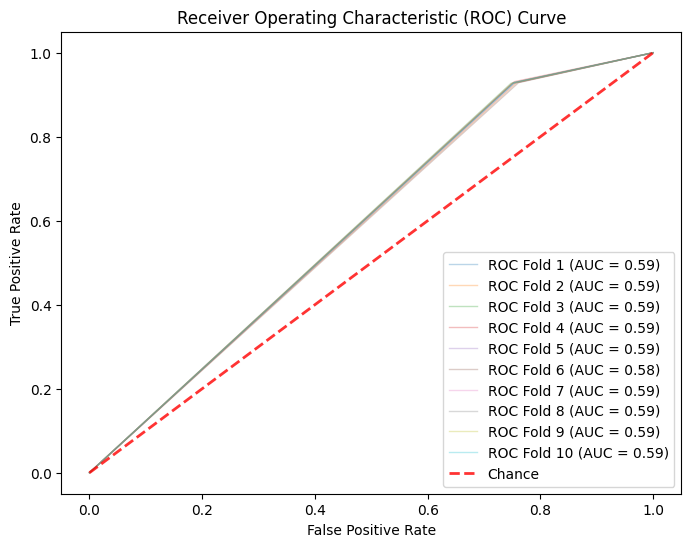

In [27]:
# Decision tree K10
model = DecisionTreeClassifier(random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


MLP


Average Sensitivity (SE): 0.9411049437914059
Average Specificity (SP): 0.225383273668133
Average Positive Predictive Value (PPV): 0.7835648597537437
Average Negative Predictive Value (NPV): 0.5622168228400016
Average F1-score (FM): 0.8551395043710541
Average Accuracy Score: 0.7612691363384363


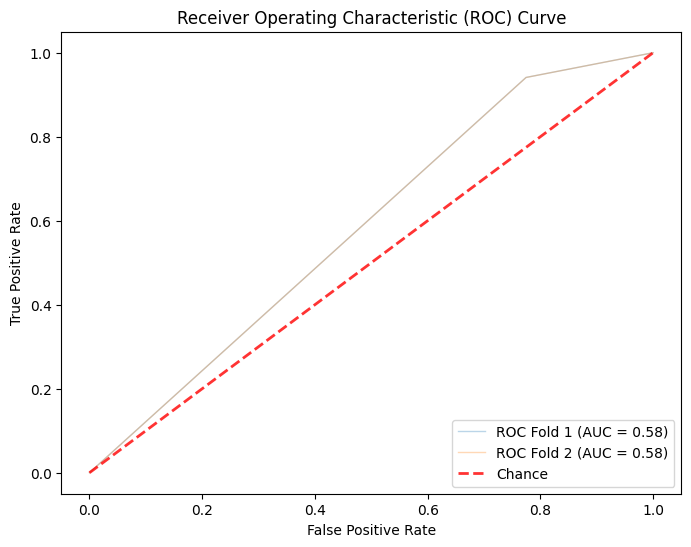

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# MLP classifier K2
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.9348059678595787
Average Specificity (SP): 0.24325988235304852
Average Positive Predictive Value (PPV): 0.7863928548179902
Average Negative Predictive Value (NPV): 0.5566158948893716
Average F1-score (FM): 0.8541741361054939
Average Accuracy Score: 0.7610256700425885


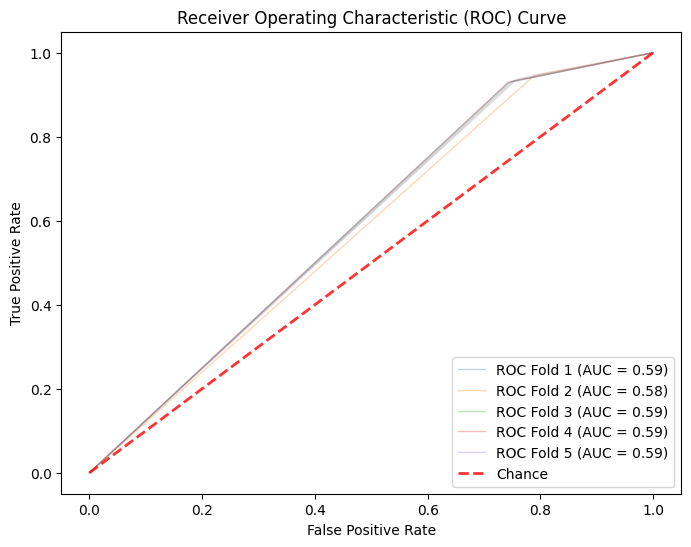

In [26]:
# MLP classifier k5
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.9423720622712576
Average Specificity (SP): 0.2218719421960269
Average Positive Predictive Value (PPV): 0.7830304093449236
Average Negative Predictive Value (NPV): 0.5639147268139549
Average F1-score (FM): 0.8553343383509084
Average Accuracy Score: 0.7613263390645048


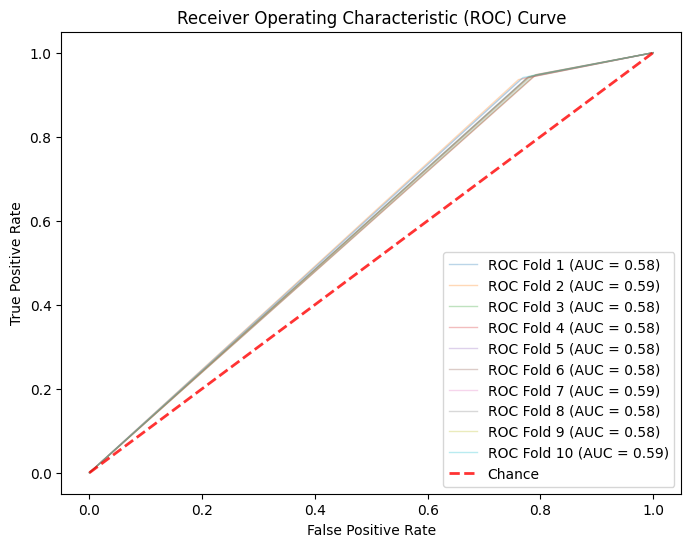

In [27]:
# MLP classifier k10
model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=100)

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


KNN


Average Sensitivity (SE): 0.8786518238074941
Average Specificity (SP): 0.2766725482728889
Average Positive Predictive Value (PPV): 0.7835402712469876
Average Negative Predictive Value (NPV): 0.43388498576803913
Average F1-score (FM): 0.8283543891801788
Average Accuracy Score: 0.727384727302594


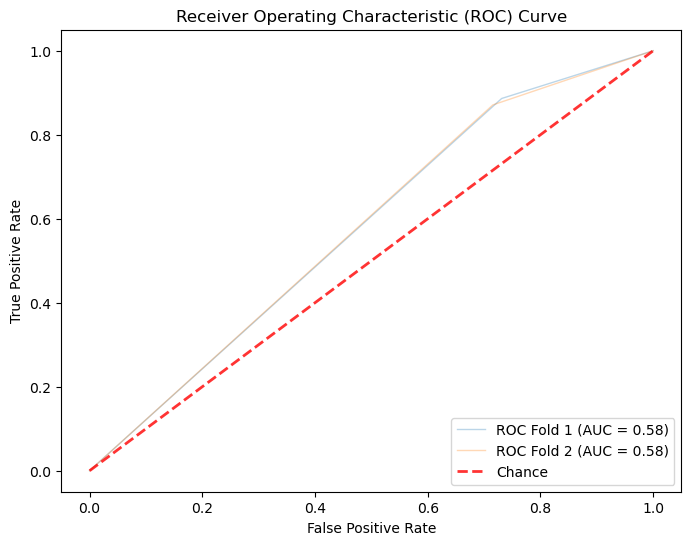

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# KNN classifier k2
model = KNeighborsClassifier()

# Define k-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8710118859748285
Average Specificity (SP): 0.2901370800078955
Average Positive Predictive Value (PPV): 0.7852625446106922
Average Negative Predictive Value (NPV): 0.43135817353225203
Average F1-score (FM): 0.8258379604503657
Average Accuracy Score: 0.7250497685019821


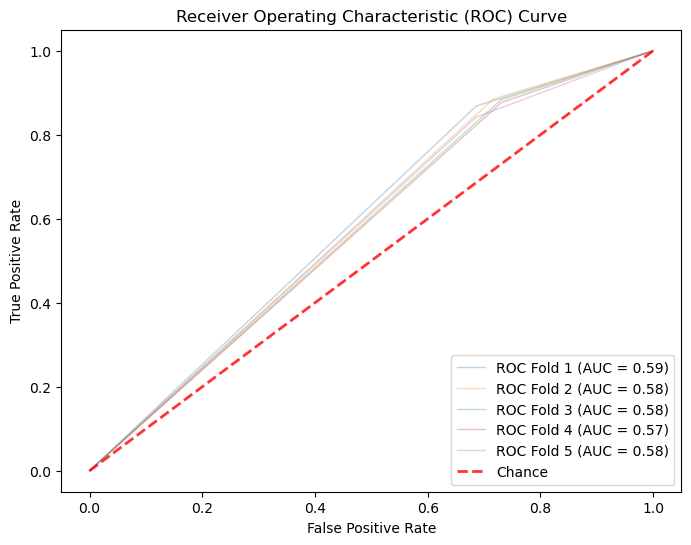

In [26]:
# KNN classifier k5
model = KNeighborsClassifier()

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Average Sensitivity (SE): 0.8787767322215112
Average Specificity (SP): 0.2835012240058541
Average Positive Predictive Value (PPV): 0.7852901915338293
Average Negative Predictive Value (NPV): 0.4397086987525286
Average F1-score (FM): 0.8292824631976032
Average Accuracy Score: 0.7291858030920738


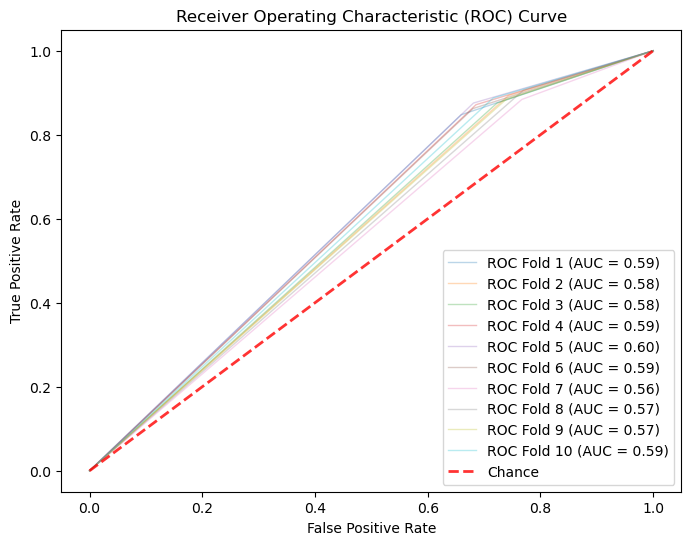

In [27]:
# KNN classifier k10
model = KNeighborsClassifier()

# Define k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

# Initialize lists to store evaluation metrics
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
f1_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Perform cross-validation
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # For classification, you don't need to round predicted values
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate Sensitivity (True Positive Rate)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    sensitivity_scores.append(sensitivity)
    
    # Calculate Specificity (True Negative Rate)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity_scores.append(specificity)
    
    # Calculate Positive Predictive Value (Precision)
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    ppv_scores.append(ppv)
    
    # Calculate Negative Predictive Value
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])
    npv_scores.append(npv)
    
    # Calculate F1-score
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)
    f1_scores.append(f1)
    
    # Calculate Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Compute average scores across all folds
avg_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
avg_specificity = sum(specificity_scores) / len(specificity_scores)
avg_ppv = sum(ppv_scores) / len(ppv_scores)
avg_npv = sum(npv_scores) / len(npv_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print average evaluation metrics
print("\nAverage Sensitivity (SE):", avg_sensitivity)
print("Average Specificity (SP):", avg_specificity)
print("Average Positive Predictive Value (PPV):", avg_ppv)
print("Average Negative Predictive Value (NPV):", avg_npv)
print("Average F1-score (FM):", avg_f1)
print("Average Accuracy Score:", avg_accuracy)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ANN

8523/8523 [==============================] - 30s 3ms/step
Mean Accuracy: 0.7611732611732611
Standard Deviation of Accuracy: 0.0003135003135003589
Mean F1 Score: 0.8538286752852502
Standard Deviation of F1 Score: 0.00030094392105023404
Mean Sensitivity (True Positive Rate): 0.9312916388663068
Mean Specificity (True Negative Rate): 0.2535512003306872
Mean Positive Predictive Value (Precision): 0.7882626558589704
Mean Negative Predictive Value: 0.5529196141769241


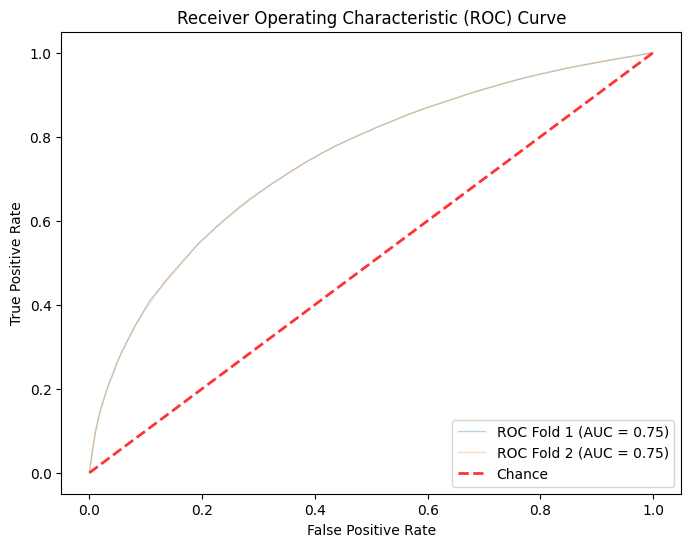

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ANN K2
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=2, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Iterate through each fold
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    cm = confusion_matrix(y_test_fold, (y_pred_fold > 0.5).astype(int))
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    ppv_scores.append(ppv)
    npv_scores.append(npv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_sensitivity = np.mean(sensitivity_scores)
mean_specificity = np.mean(specificity_scores)
mean_ppv = np.mean(ppv_scores)
mean_npv = np.mean(npv_scores)

# Print evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean F1 Score:", mean_f1)
print("Standard Deviation of F1 Score:", std_f1)
print("Mean Sensitivity (True Positive Rate):", mean_sensitivity)
print("Mean Specificity (True Negative Rate):", mean_specificity)
print("Mean Positive Predictive Value (Precision):", mean_ppv)
print("Mean Negative Predictive Value:", mean_npv)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


3410/3410 [==============================] - 7s 2ms/step
Mean Accuracy: 0.7612465942204375
Standard Deviation of Accuracy: 0.0008729911136177691
Mean F1 Score: 0.8548048499042589
Standard Deviation of F1 Score: 0.0007810456557382451
Mean Sensitivity (True Positive Rate): 0.9383507225593982
Mean Specificity (True Negative Rate): 0.23280535025206395
Mean Positive Predictive Value (Precision): 0.784934991168926
Mean Negative Predictive Value: 0.558839358546995


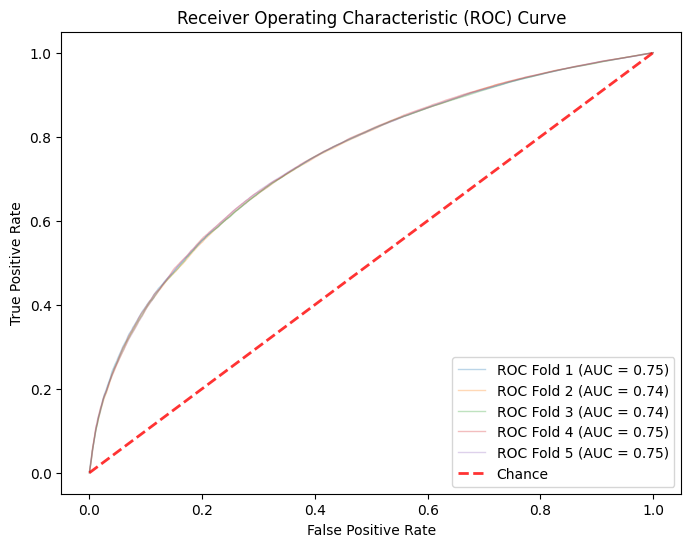

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ANN K5
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=5, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))
# Iterate through each fold
for i, (train_index, test_index) in enumerate(kf.split(X_train)):    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    cm = confusion_matrix(y_test_fold, (y_pred_fold > 0.5).astype(int))
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    ppv_scores.append(ppv)
    npv_scores.append(npv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_sensitivity = np.mean(sensitivity_scores)
mean_specificity = np.mean(specificity_scores)
mean_ppv = np.mean(ppv_scores)
mean_npv = np.mean(npv_scores)

# Print evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean F1 Score:", mean_f1)
print("Standard Deviation of F1 Score:", std_f1)
print("Mean Sensitivity (True Positive Rate):", mean_sensitivity)
print("Mean Specificity (True Negative Rate):", mean_specificity)
print("Mean Positive Predictive Value (Precision):", mean_ppv)
print("Mean Negative Predictive Value:", mean_npv)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


1705/1705 [==============================] - 3s 2ms/step
Mean Accuracy: 0.761336417900526
Standard Deviation of Accuracy: 0.001938624658645483
Mean F1 Score: 0.8550121035785985
Standard Deviation of F1 Score: 0.001634023936180007
Mean Sensitivity (True Positive Rate): 0.9395978042087073
Mean Specificity (True Negative Rate): 0.2293954812734174
Mean Positive Predictive Value (Precision): 0.7844271675639877
Mean Negative Predictive Value: 0.5604290477618961


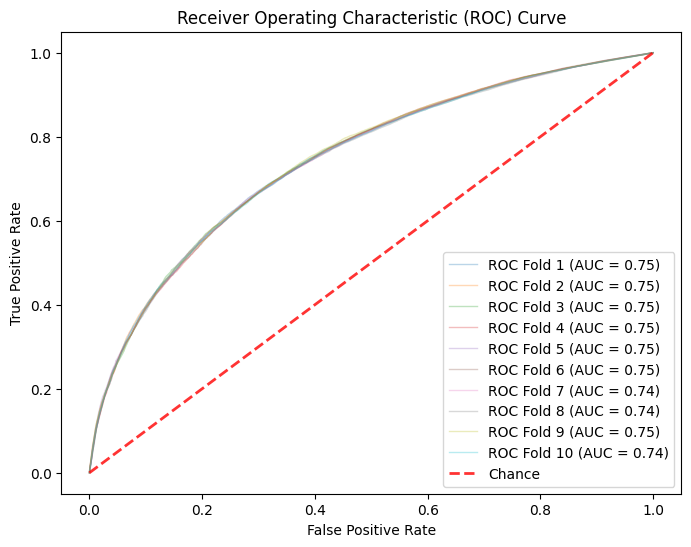

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# ANN K10
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Split the data into K folds
kf = KFold(n_splits=10, shuffle=True)

# Initialize lists to store evaluation metrics
accuracies = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
ppv_scores = []
npv_scores = []
mean_fpr = np.linspace(0, 1, 100)

# Initialize figure for ROC curve
plt.figure(figsize=(8, 6))

# Iterate through each fold
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    # Split data into train and test sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=0)

    # Evaluate the model
    y_pred_fold = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy_fold = accuracy_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    f1_fold = f1_score(y_test_fold, (y_pred_fold > 0.5).astype(int))
    cm = confusion_matrix(y_test_fold, (y_pred_fold > 0.5).astype(int))
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

    # Append evaluation metrics to lists
    accuracies.append(accuracy_fold)
    f1_scores.append(f1_fold)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    ppv_scores.append(ppv)
    npv_scores.append(npv)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_fold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

# Calculate mean and standard deviation of evaluation metrics
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_sensitivity = np.mean(sensitivity_scores)
mean_specificity = np.mean(specificity_scores)
mean_ppv = np.mean(ppv_scores)
mean_npv = np.mean(npv_scores)

# Print evaluation metrics
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean F1 Score:", mean_f1)
print("Standard Deviation of F1 Score:", std_f1)
print("Mean Sensitivity (True Positive Rate):", mean_sensitivity)
print("Mean Specificity (True Negative Rate):", mean_specificity)
print("Mean Positive Predictive Value (Precision):", mean_ppv)
print("Mean Negative Predictive Value:", mean_npv)

# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Naive Bayes


Sensitivity (True Positive Rate): 0.39765837872991433
Specificity (True Negative Rate): 0.8853820694968976
Positive Predictive Value (Precision): 0.9118042049757232
Negative Predictive Value: 0.33033231194071133
F1-score: 0.5537944900169408
Accuracy Score: 0.5202062720550059


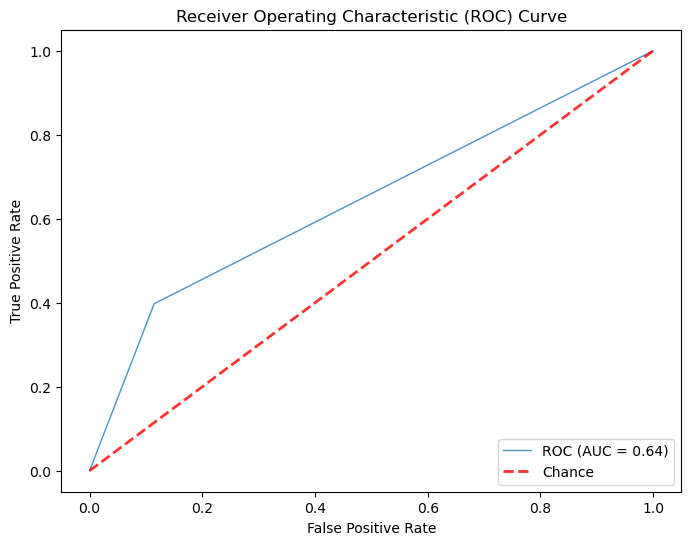

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Naive Bayes model
model = GaussianNB()

# Fit the model to the entire dataset
model.fit(X, y)

# Predict on the entire dataset
y_pred = model.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Calculate Sensitivity (True Positive Rate)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Calculate Specificity (True Negative Rate)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

# Calculate Positive Predictive Value (Precision)
ppv = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate Negative Predictive Value
npv = cm[0, 0] / (cm[0, 0] + cm[1, 0])

# Calculate F1-score
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Calculate Accuracy score
accuracy = accuracy_score(y, y_pred)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print("\nSensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Positive Predictive Value (Precision):", ppv)
print("Negative Predictive Value:", npv)
print("F1-score:", f1)
print("Accuracy Score:", accuracy)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=1, alpha=0.8, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Random Forest

precision score 0.7843083967453964
recall score 0.9340532164258883
accuracy score 0.758623977002728
f1 score 0.8526561289947132


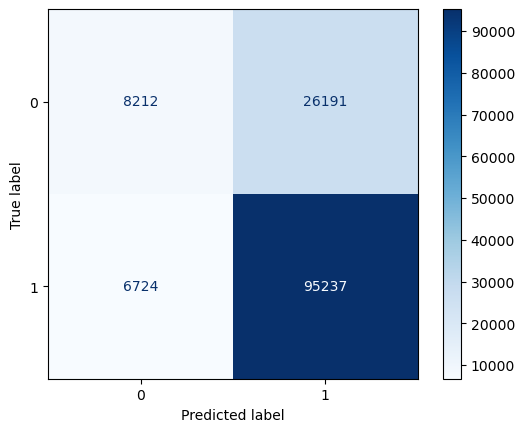

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_), display_labels=rf_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()


Naive Bayes

precision score 0.9119218270044073
recall score 0.4018104961701043
accuracy score 0.5237086034437242
f1 score 0.55783016876919


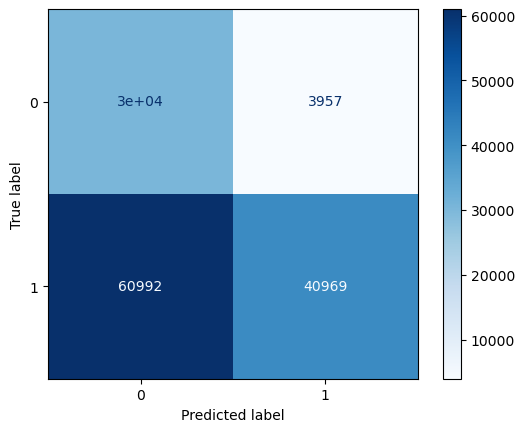

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_), display_labels=nb_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()


Decision Tree

precision score 0.7849124754575052
recall score 0.9292376496895872
accuracy score 0.7566953154791587
f1 score 0.8509992365383752


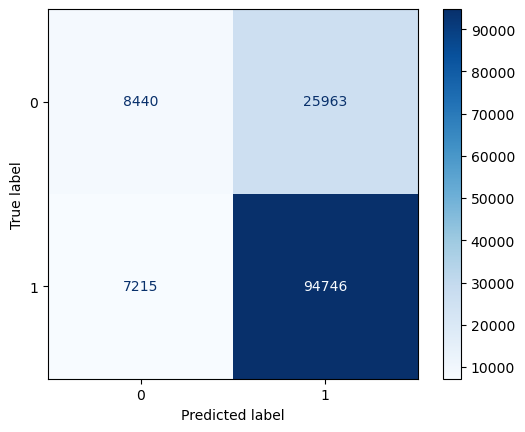

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
dt_classifier = DecisionTreeClassifier(random_state=100)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_), display_labels=dt_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()


MLP

precision score 0.7820617015051526
recall score 0.9437726189425368
accuracy score 0.7613079698454137
f1 score 0.8553409924223906


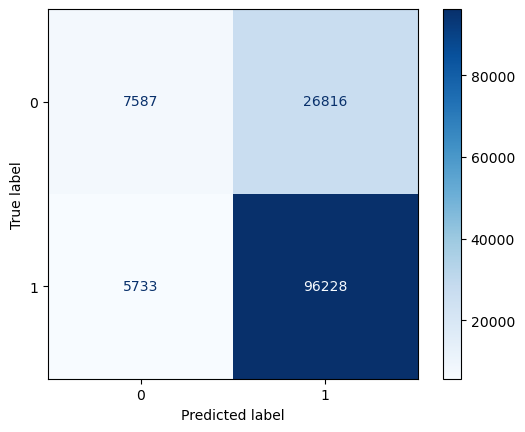

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
mlp_classifier = MLPClassifier(random_state=100)
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=mlp_classifier.classes_), display_labels=mlp_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()



KNN

precision score 0.7924553715742969
recall score 0.8655368229028746
accuracy score 0.7299653867589686
f1 score 0.8273854447439354


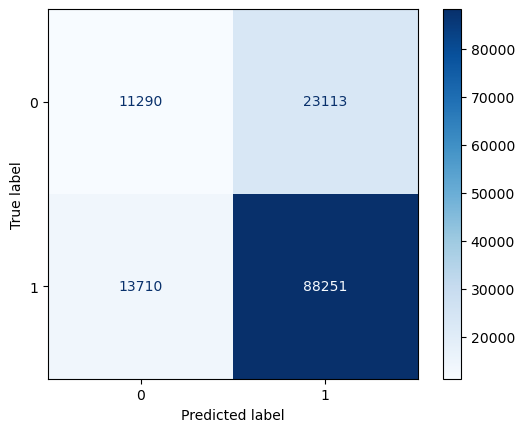

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize and train the random forest classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=knn_classifier.classes_), display_labels=knn_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()


ANN

Epoch 1/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.7643 - loss: 0.4868 - val_accuracy: 0.7675 - val_loss: 0.4813
Epoch 2/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.7672 - loss: 0.4815 - val_accuracy: 0.7681 - val_loss: 0.4799
Epoch 3/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.7687 - loss: 0.4794 - val_accuracy: 0.7681 - val_loss: 0.4805
Epoch 4/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.7691 - loss: 0.4788 - val_accuracy: 0.7684 - val_loss: 0.4798
Epoch 5/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.7687 - loss: 0.4782 - val_accuracy: 0.7681 - val_loss: 0.4794
Epoch 6/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.7686 - loss: 0.4789 - val_accuracy: 0.7677 - val_loss: 0.4801
Epoch 7/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 69s 4ms/step - accuracy: 0.7694 - loss: 0.4774 - val_accuracy: 0.7679 - val_loss: 0.4795
Epoch 8/20
17046/17046 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 

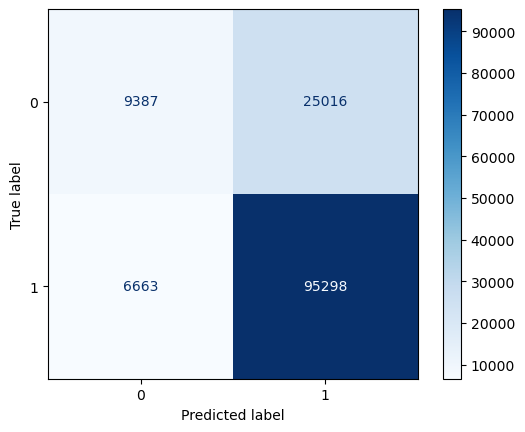

In [27]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = ann_model.predict(X_test)
# Convert probabilities to binary labels
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, X_test, y_train, and y_test

# Initialize SVM classifier
SVM = SVC(kernel='rbf', random_state=42, gamma='auto', probability=True, C=1)

# Train the SVM classifier
SVM.fit(X_train, y_train)

# Make predictions on the test set
predicted_values = SVM.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_values)
print("SVM's Accuracy is:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_values))

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, predicted_values, labels=SVM.classes_), display_labels=SVM.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.show()


In [2]:
data_s1=pd.read_csv("D:/Downloads/over_s1.csv")
data_s1.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,15-24,Odisha,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,No,No,Never in union,No births,1
1,25-34,Bihar,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Middle,No,No,No,Married,No births,1
2,25-34,Dadra & Nagar Haveli And Daman & Diu,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1
3,15-24,Gujarat,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,one-two,1
4,15-24,Uttar Pradesh,Rural,Higher,Safe,Unhygenic,Hindu,Unimproved,Poor,No,No,No,Never in union,No births,1
5,35-49,Jammu & Kashmir,Rural,No education,Safe,Unhygenic,Muslim,Unimproved,Poor,Yes,five or more,No,Married,one-two,1
6,25-34,Madhya Pradesh,Rural,Primary,Safe,Hygenic,Hindu,Improved,Middle,No,one-two,Yes,Married,No births,1
7,25-34,Uttar Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Middle,No,No,No,Never in union,No births,1
8,15-24,Uttar Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,No births,1
9,35-49,Uttarakhand,Rural,No education,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,0


In [3]:
data_s1.shape

(136366, 15)

In [4]:
dummies_state = pd.get_dummies(data_s1.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
dummies_age = pd.get_dummies(data_s1.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,1,0
8,1,0,0
9,0,0,1


In [6]:
dummies_res = pd.get_dummies(data_s1.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [7]:
dummies_edu = pd.get_dummies(data_s1.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,0,0,0,1
9,0,1,0,0


In [8]:
dummies_water = pd.get_dummies(data_s1.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [9]:
dummies_toilet = pd.get_dummies(data_s1.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,1,0


In [10]:
dummies_religion = pd.get_dummies(data_s1.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [11]:
dummies_fuel = pd.get_dummies(data_s1.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,1,0


In [12]:
dummies_wealth = pd.get_dummies(data_s1.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0
9,0,0,1


In [13]:
dummies_pregnant = pd.get_dummies(data_s1.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [14]:
dummies_children = pd.get_dummies(data_s1.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,1,0
9,0,0,1,0


In [15]:
dummies_breastfeeding = pd.get_dummies(data_s1.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [16]:
dummies_marital = pd.get_dummies(data_s1.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [17]:
dummies_births = pd.get_dummies(data_s1.Births, dtype=int)
dummies_births.head(10)

,No births,one-two,three-four
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
5,0,1,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [21]:
d_s1 = pd.concat([data_s1,dummies_age,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
d_s1

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,No,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,one-two,three-four
0,15-24,Odisha,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,1,0,0,0,1,0,0,1,0,0
1,25-34,Bihar,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Middle,No,...,1,0,0,1,0,0,0,1,0,0
2,25-34,Dadra & Nagar Haveli And Daman & Diu,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,1,0,0,1,0,0,0,1,0,0
3,15-24,Gujarat,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,0,1,0,1,0,0,0,0,1,0
4,15-24,Uttar Pradesh,Rural,Higher,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136361,35-49,Chhattisgarh,Rural,Higher,Safe,Hygenic,Hindu,Improved,Poor,No,...,1,0,0,1,0,0,0,1,0,0
136362,25-34,Maharashtra,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,1,0,0,1,0,0,0,1,0,0
136363,15-24,Punjab,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,1,0,0,0,1,0,0,1,0,0
136364,35-49,Tamil Nadu,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,1,0,0,0,0,1,0,1,0,0


In [22]:
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df_s1 = d_s1

# Drop the specified columns
df_s1.drop(columns=columns_to_remove, inplace=True)

In [23]:
df_s1.head()

,Bmi,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,...,No,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,one-two,three-four
0,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,1,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [24]:
X_s1 = df_s1.drop('Bmi',axis = 'columns')
X_s1.head()

,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,Safe,...,No,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,one-two,three-four
0,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [25]:
y_s1 = df_s1.Bmi
y_s1.head()


0    1
1    1
2    1
3    1
4    1
Name: Bmi, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_s1_train, X_s1_test, y_s1_train, y_s1_test = train_test_split(X_s1,y_s1,test_size=0.2,random_state=10)

precision score 0.7920284637214622
recall score 0.9127696963780143
accuracy score 0.7544547921097016
f1 score 0.8481233699965982


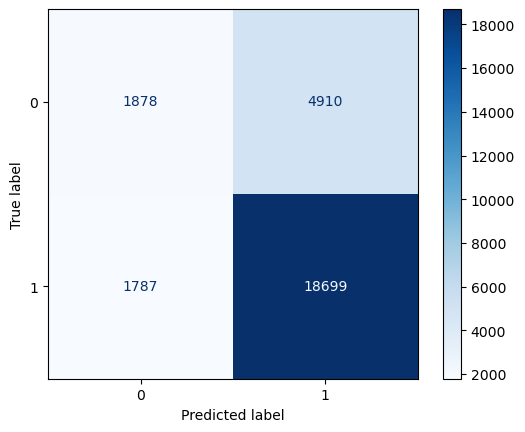

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_s1_classifier = RandomForestClassifier()
rf_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = rf_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=rf_s1_classifier.classes_), display_labels=rf_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.8574926542605289
recall score 0.6837840476422923
accuracy score 0.6771284006746352
f1 score 0.7608494921514313


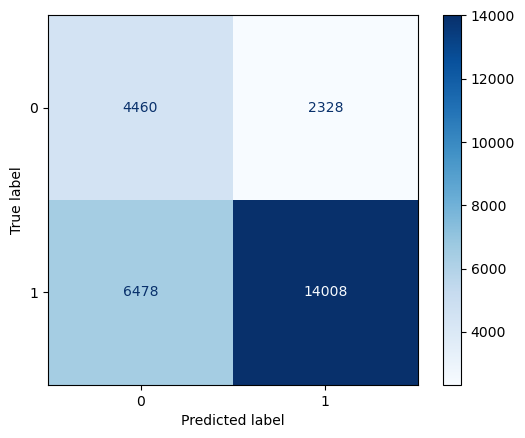

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nb_s1_classifier = GaussianNB()
nb_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = nb_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=nb_s1_classifier.classes_), display_labels=nb_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7930217531768253
recall score 0.8986625012203456
accuracy score 0.7477084402727873
f1 score 0.8425436488867531


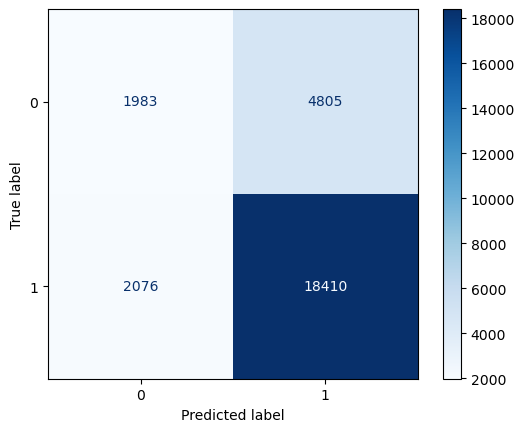

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s1_classifier = DecisionTreeClassifier(random_state=100)
dt_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = dt_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=dt_s1_classifier.classes_), display_labels=dt_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7930217531768253
recall score 0.8986625012203456
accuracy score 0.7477084402727873
f1 score 0.8425436488867531


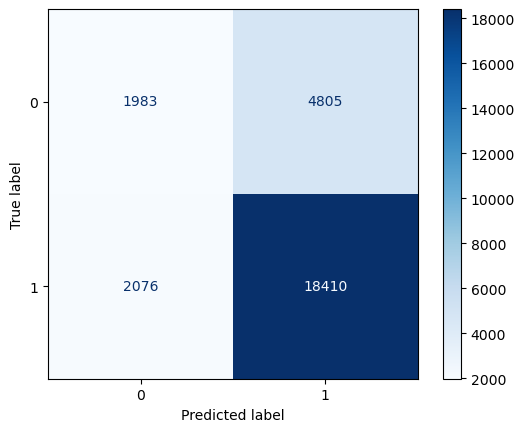

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s1_classifier = DecisionTreeClassifier(random_state=100)
dt_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = dt_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=dt_s1_classifier.classes_), display_labels=dt_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7915339480301761
recall score 0.9218978814800352
accuracy score 0.7589645816528562
f1 score 0.8517566409597259


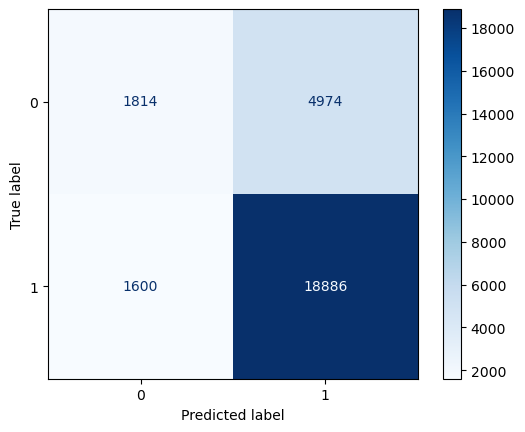

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_s1_classifier = MLPClassifier(random_state=100)
mlp_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = mlp_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=mlp_s1_classifier.classes_), display_labels=mlp_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7917683062048166
recall score 0.8714243873865078
accuracy score 0.7312825401481264
f1 score 0.8296888434457278


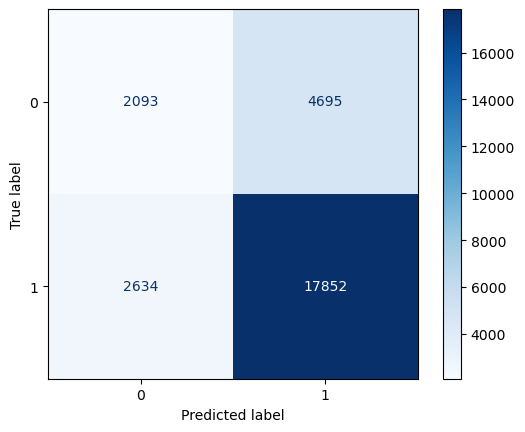

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_s1_classifier = KNeighborsClassifier()
knn_s1_classifier.fit(X_s1_train, y_s1_train)

# Predict on the test set
y_s1_pred = knn_s1_classifier.predict(X_s1_test)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred, labels=knn_s1_classifier.classes_), display_labels=knn_s1_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Epoch 1/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7556 - loss: 0.5029 - val_accuracy: 0.7623 - val_loss: 0.4909
Epoch 2/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7628 - loss: 0.4907 - val_accuracy: 0.7611 - val_loss: 0.4909
Epoch 3/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7607 - loss: 0.4913 - val_accuracy: 0.7616 - val_loss: 0.4908
Epoch 4/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7623 - loss: 0.4916 - val_accuracy: 0.7627 - val_loss: 0.4920
Epoch 5/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7622 - loss: 0.4901 - val_accuracy: 0.7636 - val_loss: 0.4889
Epoch 6/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7590 - loss: 0.4930 - val_accuracy: 0.7632 - val_loss: 0.4884
Epoch 7/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7623 - loss: 0.4887 - val_accuracy: 0.7615 - val_loss: 0.4884
Epoch 8/20
3410/3410 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7582 - loss: 0.4926

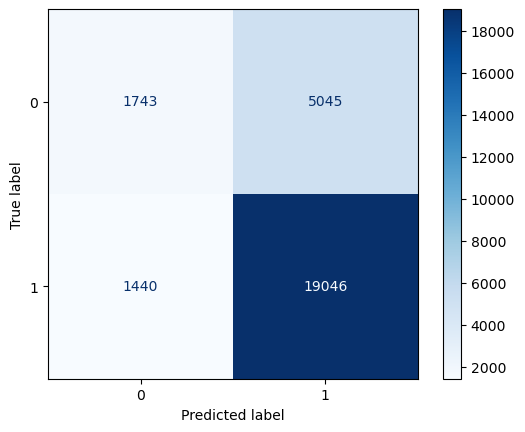

In [34]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_s1_train, y_s1_train, epochs=20, batch_size=32, validation_data=(X_s1_test, y_s1_test))

# Evaluate the model
y_s1_pred = ann.predict(X_s1_test)
# Convert probabilities to binary labels
threshold = 0.5
y_s1_pred = (y_s1_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_s1_test, y_s1_pred)
r = recall_score(y_s1_test, y_s1_pred)
a = accuracy_score(y_s1_test, y_s1_pred)
f = f1_score(y_s1_test, y_s1_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s1_test, y_s1_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()


40% of the Dataset

In [152]:
data_s2=pd.read_csv("D:/Downloads/over_s2.csv")
data_s2.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,15-24,Odisha,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,No,No,Never in union,No births,1
1,25-34,Bihar,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Middle,No,No,No,Married,No births,1
2,25-34,Dadra & Nagar Haveli And Daman & Diu,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Poor,No,one-two,No,Married,No births,1
3,15-24,Gujarat,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,one-two,1
4,15-24,Uttar Pradesh,Rural,Higher,Safe,Unhygenic,Hindu,Unimproved,Poor,No,No,No,Never in union,No births,1
5,35-49,Jammu & Kashmir,Rural,No education,Safe,Unhygenic,Muslim,Unimproved,Poor,Yes,five or more,No,Married,one-two,1
6,25-34,Madhya Pradesh,Rural,Primary,Safe,Hygenic,Hindu,Improved,Middle,No,one-two,Yes,Married,No births,1
7,25-34,Uttar Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Middle,No,No,No,Never in union,No births,1
8,15-24,Uttar Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,No births,1
9,35-49,Uttarakhand,Rural,No education,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,No births,0


In [153]:
data_s2.shape

(272727, 15)

In [154]:
dummies_state = pd.get_dummies(data_s2.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [155]:
dummies_age = pd.get_dummies(data_s2.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,1,0
7,0,1,0
8,1,0,0
9,0,0,1


In [156]:
dummies_res = pd.get_dummies(data_s2.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [157]:
dummies_edu = pd.get_dummies(data_s2.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,0,0,0,1
9,0,1,0,0


In [158]:
dummies_water = pd.get_dummies(data_s2.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [159]:
dummies_toilet = pd.get_dummies(data_s2.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,1,0


In [160]:
dummies_religion = pd.get_dummies(data_s2.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [161]:
dummies_fuel = pd.get_dummies(data_s2.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,1,0


In [162]:
dummies_wealth = pd.get_dummies(data_s2.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0
9,0,0,1


In [163]:
dummies_pregnant = pd.get_dummies(data_s2.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [164]:
dummies_children = pd.get_dummies(data_s2.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,1,0,0,0
8,0,0,1,0
9,0,0,1,0


In [165]:
dummies_breastfeeding = pd.get_dummies(data_s2.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [166]:
dummies_marital = pd.get_dummies(data_s2.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [167]:
dummies_births = pd.get_dummies(data_s2.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [168]:
d_s2 = pd.concat([data_s2,dummies_age,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
d_s2

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,15-24,Odisha,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
1,25-34,Bihar,Rural,No education,Safe,Unhygenic,Hindu,Unimproved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
2,25-34,Dadra & Nagar Haveli And Daman & Diu,Rural,Primary,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,1,0,0,0
3,15-24,Gujarat,Rural,Secondary,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,1,0,1,0,0,0,0,0,1,0
4,15-24,Uttar Pradesh,Rural,Higher,Safe,Unhygenic,Hindu,Unimproved,Poor,No,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272722,35-49,Karnataka,Rural,Secondary,Safe,Unhygenic,Muslim,Improved,Middle,No,...,0,0,1,0,0,0,1,0,0,0
272723,25-34,Rajasthan,Rural,Primary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
272724,35-49,Bihar,Rural,No education,Safe,Hygenic,Hindu,Unimproved,Poor,No,...,0,0,1,0,0,0,1,0,0,0
272725,15-24,Madhya Pradesh,Rural,Secondary,Safe,Unhygenic,Hindu,Improved,Middle,No,...,0,0,0,1,0,0,1,0,0,0


In [169]:
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df_s2 = d_s2

# Drop the specified columns
df_s2.drop(columns=columns_to_remove, inplace=True)

In [170]:
df_s2.head()

,Bmi,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,1,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [171]:
X_s2 = df_s2.drop('Bmi',axis = 'columns')
X_s2.head()

,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,Safe,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [172]:
y_s2 = df_s2.Bmi
y_s2.head()

0    1
1    1
2    1
3    1
4    1
Name: Bmi, dtype: int64

In [173]:
print("Shape of X_s2:", X_s2.shape)


Shape of X_s2: (272727, 35)


In [174]:
print("Shape of y_s2:", y_s2.shape)


Shape of y_s2: (272727,)


In [175]:
from sklearn.model_selection import train_test_split
X_s2_train, X_s2_test, y_s2_train, y_s2_test = train_test_split(X_s2,y_s2,test_size=0.2,random_state=10)

precision score 0.7857660830829793
recall score 0.9276925711210586
accuracy score 0.7562424375756243
f1 score 0.8508514122899513


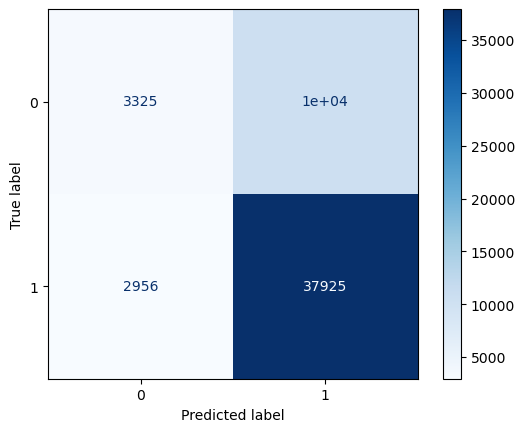

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_s2_classifier = RandomForestClassifier()
rf_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = rf_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=rf_s2_classifier.classes_), display_labels=rf_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.911798458932182
recall score 0.4081358088109391
accuracy score 0.5268213984526822
f1 score 0.5638729300439338


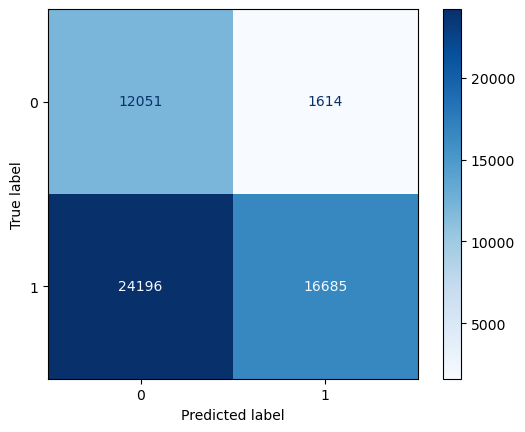

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nb_s2_classifier = GaussianNB()
nb_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = nb_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=nb_s2_classifier.classes_), display_labels=nb_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7868141537301239
recall score 0.9186908343729361
accuracy score 0.7525024749752502
f1 score 0.8476538695917124


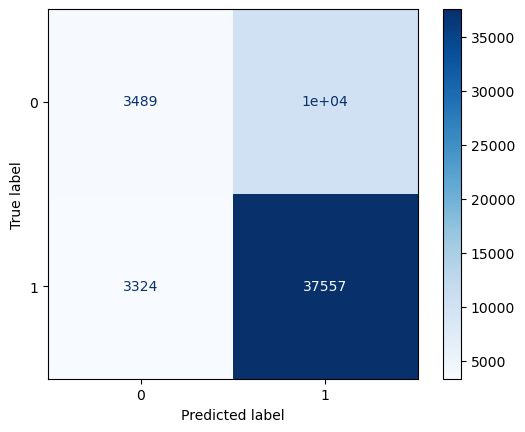

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s2_classifier = DecisionTreeClassifier(random_state=100)
dt_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = dt_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=dt_s2_classifier.classes_), display_labels=dt_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7857861351179357
recall score 0.9363273892517306
accuracy score 0.7609723902760972
f1 score 0.8544768622898855


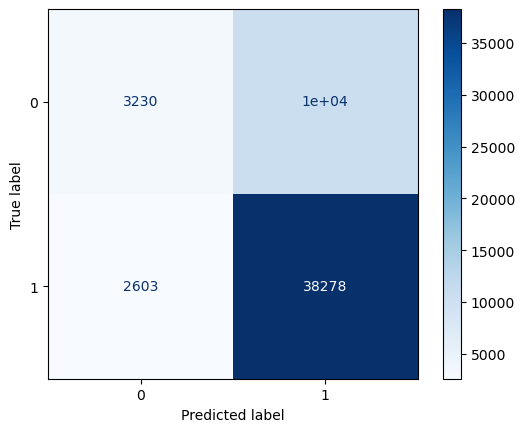

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_s2_classifier = MLPClassifier(random_state=100)
mlp_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = mlp_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=mlp_s2_classifier.classes_), display_labels=mlp_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7944651741293532
recall score 0.874978596413982
accuracy score 0.7366443002236644
f1 score 0.8327803969501193


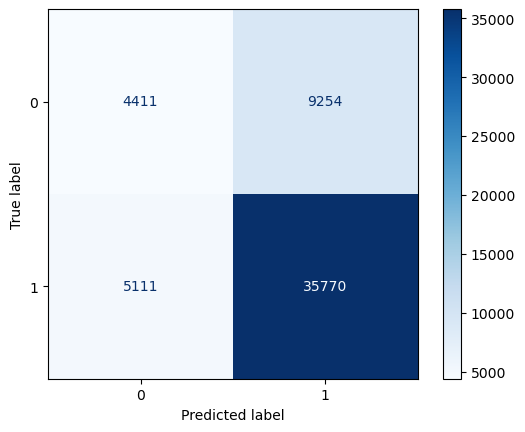

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_s2_classifier = KNeighborsClassifier()
knn_s2_classifier.fit(X_s2_train, y_s2_train)

# Predict on the test set
y_s2_pred = knn_s2_classifier.predict(X_s2_test)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred, labels=knn_s2_classifier.classes_), display_labels=knn_s2_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Epoch 1/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7539 - loss: 0.5000 - val_accuracy: 0.7610 - val_loss: 0.4890
Epoch 2/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7592 - loss: 0.4935 - val_accuracy: 0.7605 - val_loss: 0.4988
Epoch 3/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7610 - loss: 0.4918 - val_accuracy: 0.7613 - val_loss: 0.4935
Epoch 4/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7618 - loss: 0.4921 - val_accuracy: 0.7606 - val_loss: 0.4885
Epoch 5/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7610 - loss: 0.4918 - val_accuracy: 0.7614 - val_loss: 0.4897
Epoch 6/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7614 - loss: 0.4905 - val_accuracy: 0.7613 - val_loss: 0.4891
Epoch 7/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7611 - loss: 0.4896 - val_accuracy: 0.7615 - val_loss: 0.4900
Epoch 8/20
6819/6819 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7616 - loss: 0

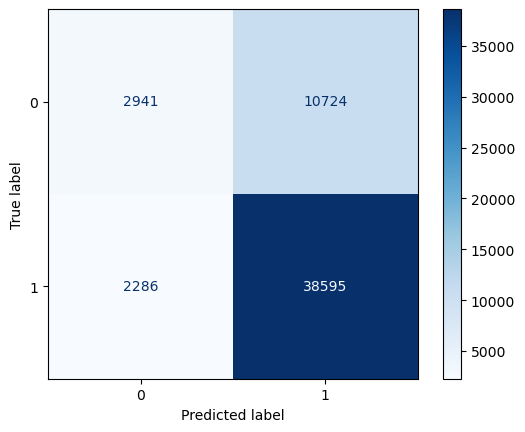

In [181]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_s2_train, y_s2_train, epochs=20, batch_size=32, validation_data=(X_s2_test, y_s2_test))

# Evaluate the model
y_s2_pred = ann.predict(X_s2_test)
# Convert probabilities to binary labels
threshold = 0.5
y_s2_pred = (y_s2_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_s2_test, y_s2_pred)
r = recall_score(y_s2_test, y_s2_pred)
a = accuracy_score(y_s2_test, y_s2_pred)
f = f1_score(y_s2_test, y_s2_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s2_test, y_s2_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()


60% of Dataset

In [123]:
data_s3=pd.read_csv("D:/Downloads/over_s3.csv")
data_s3.head(10)

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,children,Currently_breastfeeding,marital_status,Births,Bmi
0,35-49,Nagaland,Rural,Primary,Safe,Hygenic,Christian,Unimproved,Poor,No,three-four,No,Widowed,No births,1
1,35-49,Bihar,Rural,No education,Safe,Hygenic,Muslim,Improved,Poor,No,three-four,No,Widowed,No births,1
2,25-34,Bihar,Rural,No education,Safe,Hygenic,Muslim,Unimproved,Poor,No,five or more,No,Married,No births,1
3,35-49,Uttar Pradesh,Urban,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,No,No,Married,one-two,1
4,15-24,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,No,No,Never in union,one-two,1
5,25-34,Jharkhand,Urban,No education,Safe,Hygenic,Muslim,Improved,Rich,No,three-four,No,Married,No births,1
6,35-49,Tripura,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,one-two,No,Married,one-two,0
7,15-24,Uttarakhand,Rural,Secondary,Safe,Hygenic,Hindu,Unimproved,Poor,No,one-two,Yes,Married,No births,1
8,15-24,Chhattisgarh,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Middle,No,No,No,Never in union,No births,1
9,15-24,Himachal Pradesh,Rural,Higher,Safe,Hygenic,Hindu,Improved,Rich,Yes,No,No,Married,No births,1


In [124]:
data_s3.shape

(409092, 15)

In [125]:
dummies_state = pd.get_dummies(data_s3.State, dtype=int)
dummies_state.head(10)

,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra & Nagar Haveli And Daman & Diu,Goa,Gujarat,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
dummies_age = pd.get_dummies(data_s3.Age, dtype=int)
dummies_age.head(10)

,15-24,25-34,35-49
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
5,0,1,0
6,0,0,1
7,1,0,0
8,1,0,0
9,1,0,0


In [127]:
dummies_res = pd.get_dummies(data_s3.residence, dtype=int)
dummies_res.head(10)

,Rural,Urban
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,1,0


In [128]:
dummies_edu = pd.get_dummies(data_s3.education, dtype=int)
dummies_edu.head(10)

,Higher,No education,Primary,Secondary
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1
5,0,1,0,0
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,1,0,0,0


In [129]:
dummies_water = pd.get_dummies(data_s3.drinking_water, dtype=int)
dummies_water.head(10)

,Safe,Unsafe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [130]:
dummies_toilet = pd.get_dummies(data_s3.toilet_facility, dtype=int)
dummies_toilet.head(10)

,Hygenic,Unhygenic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [131]:
dummies_religion = pd.get_dummies(data_s3.Religion, dtype=int)
dummies_religion.head(10)

,Christian,Hindu,Muslim,Other
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
5,0,0,1,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [132]:
dummies_fuel = pd.get_dummies(data_s3.cooking_fuel, dtype=int)
dummies_fuel.head(10)

,Improved,Unimproved
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,1,0
7,0,1
8,1,0
9,1,0


In [133]:
dummies_wealth = pd.get_dummies(data_s3.Wealth, dtype=int)
dummies_wealth.head(10)

,Middle,Poor,Rich
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,0,1,0
8,1,0,0
9,0,0,1


In [134]:
dummies_pregnant = pd.get_dummies(data_s3.Currently_pregnant, dtype=int)
dummies_pregnant.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [135]:
dummies_children = pd.get_dummies(data_s3.children, dtype=int)
dummies_children.head(10)

,No,five or more,one-two,three-four
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,0,0,0,1
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0


In [136]:
dummies_breastfeeding = pd.get_dummies(data_s3.Currently_breastfeeding, dtype=int)
dummies_breastfeeding.head(10)

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,1,0


In [137]:
dummies_marital = pd.get_dummies(data_s3.marital_status, dtype=int)
dummies_marital.head(10)

,Divorced,Married,Never in union,Widowed,together/separated
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [138]:
dummies_births = pd.get_dummies(data_s3.Births, dtype=int)
dummies_births.head(10)

,No births,five or more,one-two,three-four
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,0,1,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [139]:
d_s3 = pd.concat([data_s3,dummies_age,dummies_res,dummies_edu,dummies_water,dummies_toilet,dummies_fuel,dummies_wealth,dummies_pregnant,dummies_children,dummies_breastfeeding,dummies_marital,dummies_births],axis='columns')
d_s3

,Age,State,residence,education,drinking_water,toilet_facility,Religion,cooking_fuel,Wealth,Currently_pregnant,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,35-49,Nagaland,Rural,Primary,Safe,Hygenic,Christian,Unimproved,Poor,No,...,0,0,0,0,1,0,1,0,0,0
1,35-49,Bihar,Rural,No education,Safe,Hygenic,Muslim,Improved,Poor,No,...,0,0,0,0,1,0,1,0,0,0
2,25-34,Bihar,Rural,No education,Safe,Hygenic,Muslim,Unimproved,Poor,No,...,0,0,1,0,0,0,1,0,0,0
3,35-49,Uttar Pradesh,Urban,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,0,0,1,0
4,15-24,Jammu & Kashmir,Rural,Secondary,Safe,Hygenic,Muslim,Unimproved,Poor,No,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409087,35-49,Jharkhand,Urban,Higher,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,0,0,1,0
409088,25-34,Puducherry,Urban,Secondary,Safe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,1,0,0,0
409089,25-34,Jharkhand,Urban,Secondary,Safe,Hygenic,Hindu,Unimproved,Middle,No,...,0,0,0,1,0,0,0,0,1,0
409090,35-49,Kerala,Urban,Secondary,Unsafe,Hygenic,Hindu,Improved,Rich,No,...,0,0,1,0,0,0,0,0,1,0


In [140]:
columns_to_remove = ['Age', 'State','residence', 'education', 'drinking_water', 'toilet_facility','Religion', 'cooking_fuel', 'Wealth', 'Currently_pregnant', 'children', 'Currently_breastfeeding', 'marital_status', 'Births']


# Read your dataset into a DataFrame
df_s3 = d_s3

# Drop the specified columns
df_s3.drop(columns=columns_to_remove, inplace=True)

In [141]:
df_s3.head()

,Bmi,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [142]:
X_s3 = df_s3.drop('Bmi',axis = 'columns')
X_s3.head()

,15-24,25-34,35-49,Rural,Urban,Higher,No education,Primary,Secondary,Safe,...,Yes,Divorced,Married,Never in union,Widowed,together/separated,No births,five or more,one-two,three-four
0,0,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [143]:
y_s3 = df_s3.Bmi
y_s3.head()

0    1
1    1
2    1
3    1
4    1
Name: Bmi, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_s3_train, X_s3_test, y_s3_train, y_s3_test = train_test_split(X_s3,y_s3,test_size=0.2,random_state=10)

precision score 0.7878662415986972
recall score 0.9291212994157186
accuracy score 0.7589068553758906
f1 score 0.8526833057011843


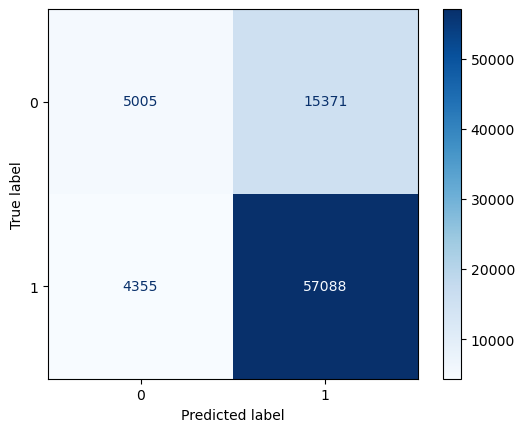

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_s3_classifier = RandomForestClassifier()
rf_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = rf_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=rf_s3_classifier.classes_), display_labels=rf_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.9139809350885156
recall score 0.3932425174552024
accuracy score 0.5165548344516555
f1 score 0.5498924657768067


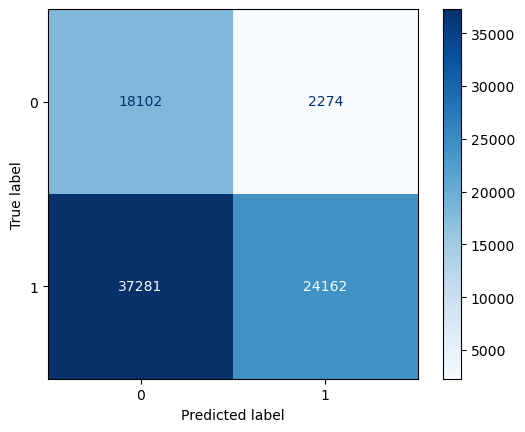

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nb_s3_classifier = GaussianNB()
nb_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = nb_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=nb_s3_classifier.classes_), display_labels=nb_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.788004437664679
recall score 0.9248083589668473
accuracy score 0.7566946552756695
f1 score 0.8509430712900496


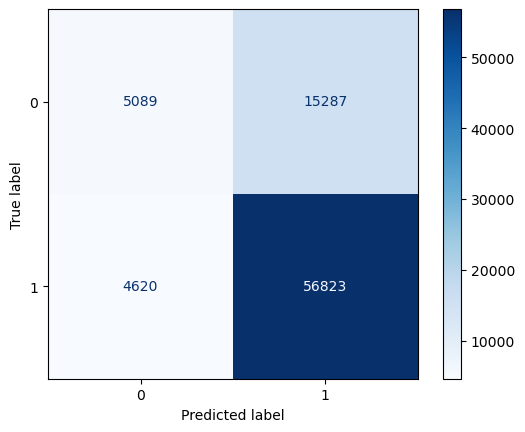

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_s3_classifier = DecisionTreeClassifier(random_state=100)
dt_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = dt_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=dt_s3_classifier.classes_), display_labels=dt_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7940146762267533
recall score 0.9227902283417151
accuracy score 0.7622434886762244
f1 score 0.8535727996025623


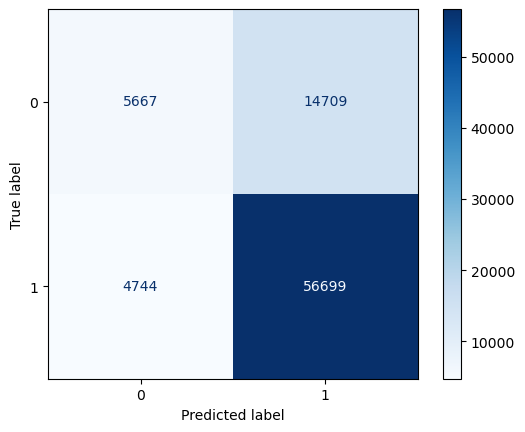

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp_s3_classifier = MLPClassifier(random_state=100)
mlp_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = mlp_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=mlp_s3_classifier.classes_), display_labels=mlp_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

precision score 0.7891895877885112
recall score 0.8709047409794444
accuracy score 0.7283516053728352
f1 score 0.8280360237682595


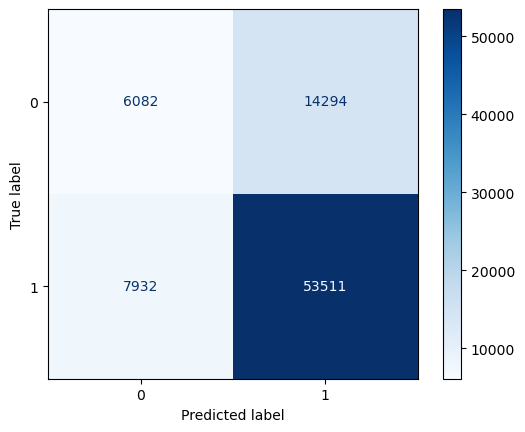

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_s3_classifier = KNeighborsClassifier()
knn_s3_classifier.fit(X_s3_train, y_s3_train)

# Predict on the test set
y_s3_pred = knn_s3_classifier.predict(X_s3_test)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred, labels=knn_s3_classifier.classes_), display_labels=knn_s3_classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)  # Setting colormap to Blues for blue shades
plt.show()

Epoch 1/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7556 - loss: 0.4983 - val_accuracy: 0.7629 - val_loss: 0.4891
Epoch 2/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7581 - loss: 0.4953 - val_accuracy: 0.7634 - val_loss: 0.4889
Epoch 3/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.7579 - loss: 0.4936 - val_accuracy: 0.7629 - val_loss: 0.4894
Epoch 4/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7585 - loss: 0.4934 - val_accuracy: 0.7635 - val_loss: 0.4890
Epoch 5/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7596 - loss: 0.4926 - val_accuracy: 0.7632 - val_loss: 0.4901
Epoch 6/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7592 - loss: 0.4913 - val_accuracy: 0.7637 - val_loss: 0.4896
Epoch 7/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7603 - loss: 0.4918 - val_accuracy: 0.7633 - val_loss: 0.4903
Epoch 8/20
10228/10228 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 

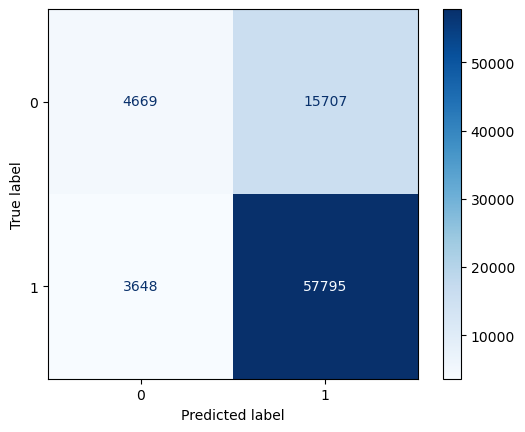

In [151]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
ann.fit(X_s3_train, y_s3_train, epochs=20, batch_size=32, validation_data=(X_s3_test, y_s3_test))

# Evaluate the model
y_s3_pred = ann.predict(X_s3_test)
# Convert probabilities to binary labels
threshold = 0.5
y_s3_pred = (y_s3_pred > threshold).astype(int)

# Calculate evaluation metrics
p = precision_score(y_s3_test, y_s3_pred)
r = recall_score(y_s3_test, y_s3_pred)
a = accuracy_score(y_s3_test, y_s3_pred)
f = f1_score(y_s3_test, y_s3_pred)

print("precision score", p)
print("recall score", r)
print("accuracy score", a)
print("f1 score", f)

# Plot confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_s3_test, y_s3_pred), display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Saving the model architecture to JSON 

In [28]:
# Saving the model architecture to JSON and the weights to HDF5
model_json = ann_model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)
ann_model.save_weights("model_weights.weights.h5")

